# Summary:
---
1. This notebook mimics the star plots found in this paper: https://mycovirus-ml.slack.com/files/UQWG7JAJ3/F012B4MMLRM/nakashami1998-dinucleotidespace.pdf

In [1]:
import pandas as pd
from Bio import SeqIO
def parseFasta(data):
    d = {fasta.id : str(fasta.seq) for fasta in SeqIO.parse(data, "fasta")}
    pd.DataFrame([d])

    s = pd.Series(d, name='Sequence')
    s.index.name = 'ID'
    s.reset_index()
    return pd.DataFrame(s)

# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
def kmerXTable(s, a, b):
    tfid_vector = TfidfVectorizer(analyzer='char', ngram_range=(a,b))
    s_hat = tfid_vector.fit_transform(s.Sequence)
    kmerNames = tfid_vector.get_feature_names()
    kmers = s_hat.toarray()
    return pd.DataFrame(kmers,columns=kmerNames, index = s.index)

# raw frequency
from sklearn.feature_extraction.text import CountVectorizer
def kmerXTabletf(s, a, b):
    tf_vector = CountVectorizer(analyzer='char', ngram_range=(a,b))
    s_hat = tf_vector.fit_transform(s.Sequence)
    kmerNames = tf_vector.get_feature_names()
    kmers = s_hat.toarray()
    df = pd.DataFrame(kmers,columns=kmerNames, index = s.index)
    return df.div(df.apply(sum, axis=1), axis=0)

import matplotlib.pyplot as plt

In [2]:
virus1 = parseFasta("data/Sclerotinia_biocontrol_mycovirus_nucleotide.fasta")

# put confirmed virus killers at bottom, and removed the duplicates already in the data
virus01 = parseFasta("data/mycovirus_genbank_all_refseq_nucleotide_unique.fasta")
virus01 = virus01.append(virus1)
virus01 = virus01.drop_duplicates(keep="last")

# labels for virus01
labels = [0 for x in range(343)] + [1 for x in range(7)]

In [3]:
columns = ["aa","ac","at","ca","cc","tc","cg","ct",
           "tt","gt","ta","tg","gg","ga","gc","ag"]

In [4]:
kmer2Table01_tfidf = kmerXTable(virus01, 2,2)[columns]
kmer2Table01_tf = kmerXTabletf(virus01, 2,2)[columns]

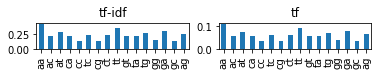

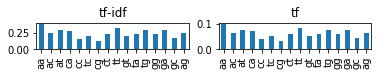

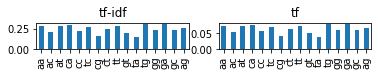

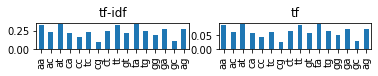

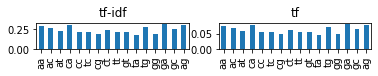

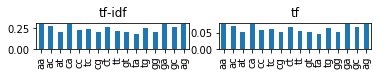

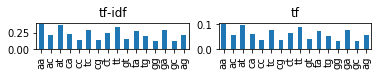

In [5]:
# comapres 7 fungus killers tf vs. tf-idf
for i in range(0, 7):
    plt.subplot(7,2, i*2+1)
    kmer2Table01_tfidf.iloc[343+i].plot.bar(title="tf-idf")
    plt.subplot(7,2, i*2+2)
    kmer2Table01_tf.iloc[343+i].plot.bar(title="tf")
    plt.show()

tf-idf and tf are about the same, so i'll use tf

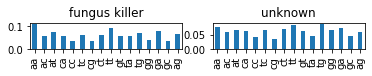

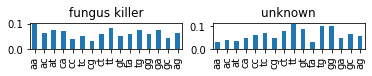

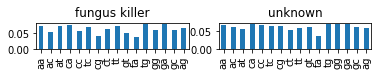

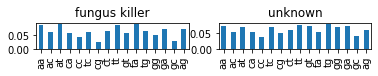

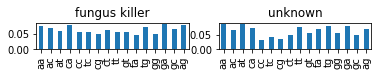

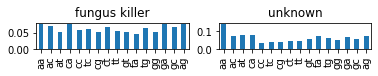

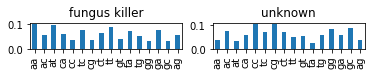

In [6]:
# comapres 7 fungus killers with first 7 viruses in the data, which are unknown
for i in range(0, 7):
    plt.subplot(7,2, i*2+1)
    kmer2Table01_tf.iloc[343+i].plot.bar(title="fungus killer")
    plt.subplot(7,2, i*2+2)
    kmer2Table01_tf.iloc[i].plot.bar(title="unknown")
    plt.show()

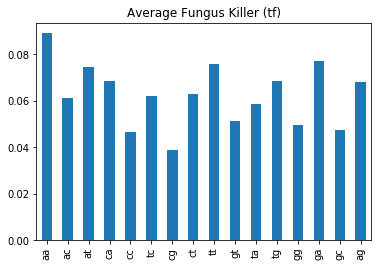

In [7]:
averageKiller = kmer2Table01_tf.iloc[343:].sum()/7
averageKiller.plot.bar(title="Average Fungus Killer (tf)")
plt.show()

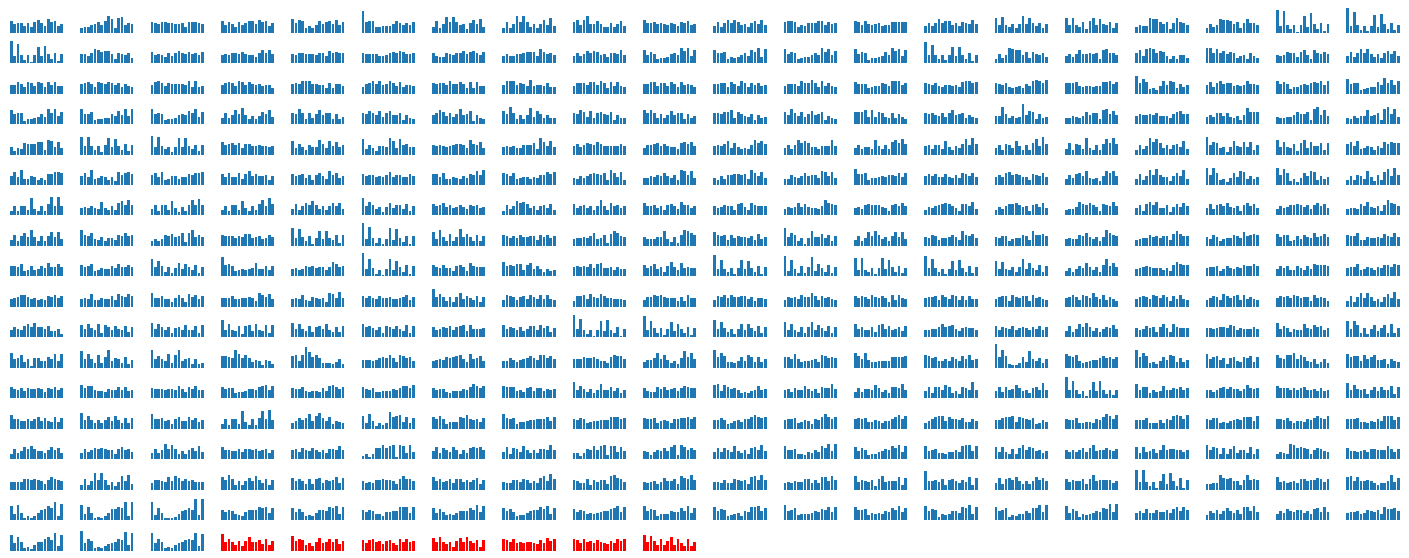

In [8]:
# all 350 viruses. blue = unknown, red = fungus killer
fig, axs = plt.subplots(nrows=18, ncols=20, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(25)
for i in range(0,343): 
    r = int(i/20)
    c = i%20
    axs[r,c].bar(x = kmer2Table01_tf.columns, height = kmer2Table01_tf.iloc[i].values)
    axs[r,c].axis('off')
for i in range(343,350): 
    r = int(i/20)
    c = i%20
    axs[r,c].bar(x = kmer2Table01_tf.columns, height = kmer2Table01_tf.iloc[i].values, color='red')
    axs[r,c].axis('off')
for i in range(0,10):
    fig.delaxes(axs[17][10+i])